In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Proprietati ale regresiei multi-variabila

In [128]:
# see https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130
# and https://seaborn.pydata.org/tutorial/regression.html, and
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
swiss = pd.read_csv('swiss.csv')
swiss.columns = ['District', 'Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 
                 'InfantMortality']
swiss.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [129]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
InfantMortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


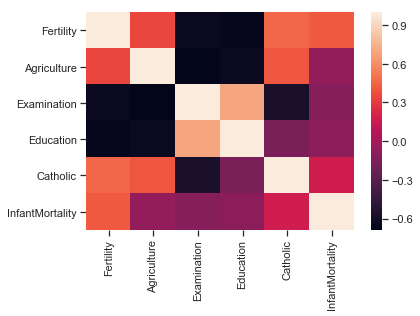

In [130]:
sns.heatmap(swiss.corr())
plt.show()

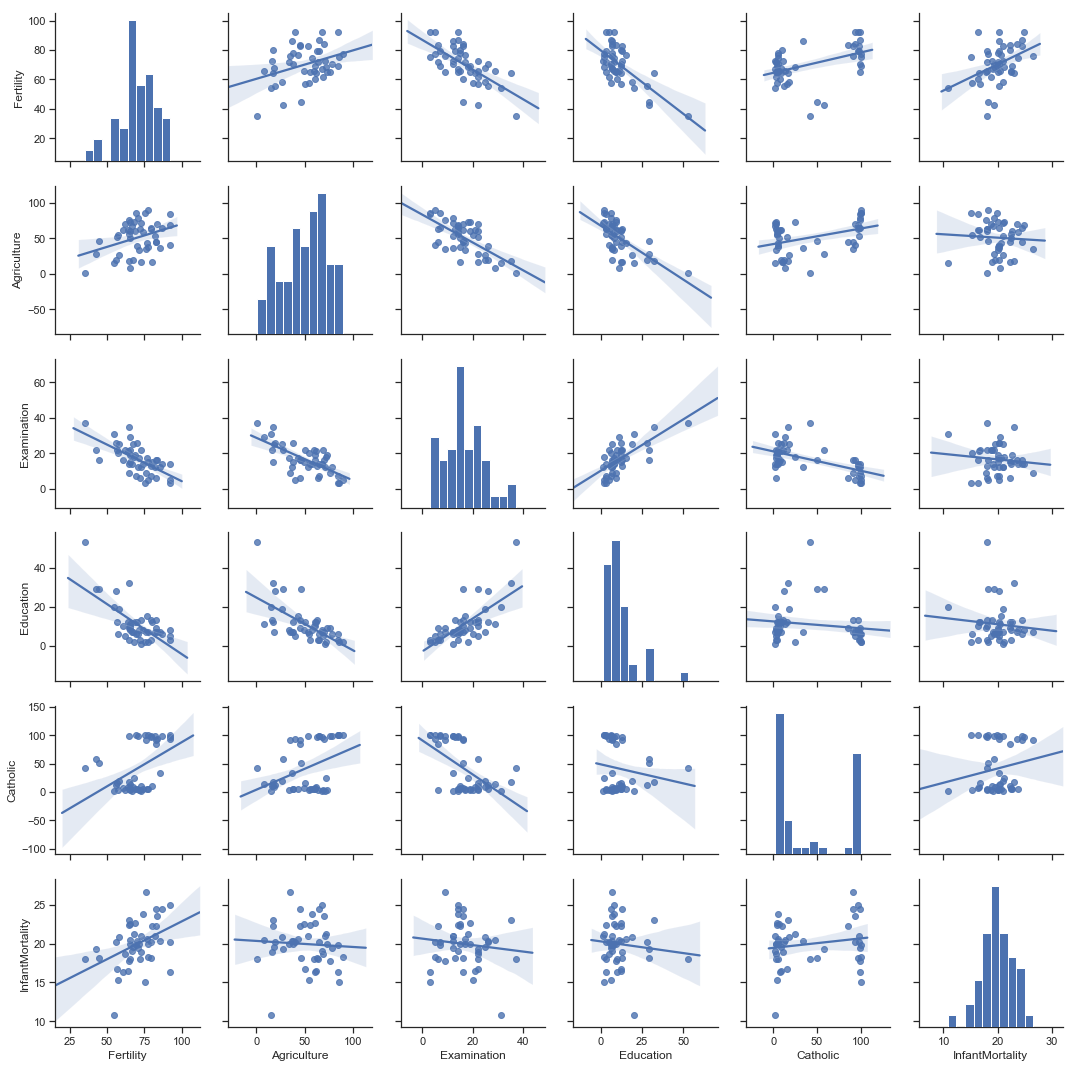

In [131]:
sns.set(style="ticks")
sns.pairplot(swiss, kind='reg')
plt.show()

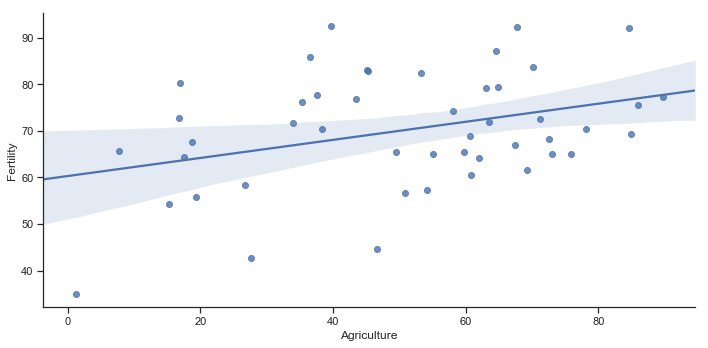

0.35307918361997476


In [132]:
sns.lmplot(x='Agriculture', y='Fertility', data=swiss, aspect=2)
plt.show()
print(swiss.corr()['Agriculture']['Fertility'])

In [133]:
# https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame
lm = smf.ols(formula='Fertility ~ Agriculture + Examination + Education + Catholic + InfantMortality', 
             data=swiss).fit()
print(lm.params)
lm.summary()

Intercept          66.915182
Agriculture        -0.172114
Examination        -0.258008
Education          -0.870940
Catholic            0.104115
InfantMortality     1.077048
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sun, 12 May 2019   Prob (F-statistic):           5.59e-10
Time:                        14:18:59   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture        -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Examination        -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education          -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Catholic            0.1041      0.035      2.953      0.005       0.033       0.175
InfantMortality     1.0770      0.382      2.822      0.007       0.306       1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
lm = smf.ols(formula='Fertility ~ Agriculture', data=swiss).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Sun, 12 May 2019   Prob (F-statistic):             0.0149
Time:                        14:18:59   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
n = 100 ; x2 = np.array(range(1, n+1))
x1 = .01 * x2 + np.random.uniform(-.1, .1, size=n)
y = -x1 + x2 + np.random.randn(n)*.01

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
lm1 = smf.ols(formula='y ~ x1', data=df).fit()
lm2 = smf.ols(formula='y ~ x1 + x2', data=df).fit()
print(lm1.summary())
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2293.
Date:                Sun, 12 May 2019   Prob (F-statistic):           8.54e-70
Time:                        14:19:23   Log-Likelihood:                -317.47
No. Observations:                 100   AIC:                             638.9
Df Residuals:                      98   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6444      1.208     -0.533      0.5

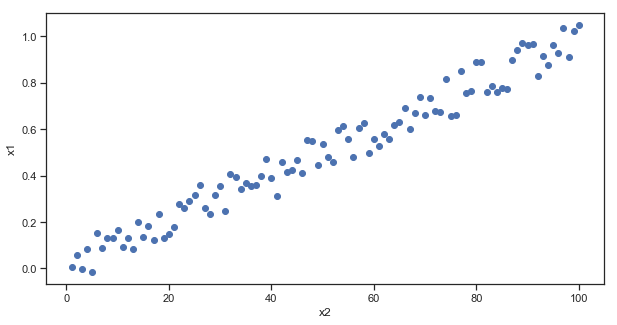

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x2, x1, 'o')
ax.set_xlabel('x2')
ax.set_ylabel('x1')
plt.show()

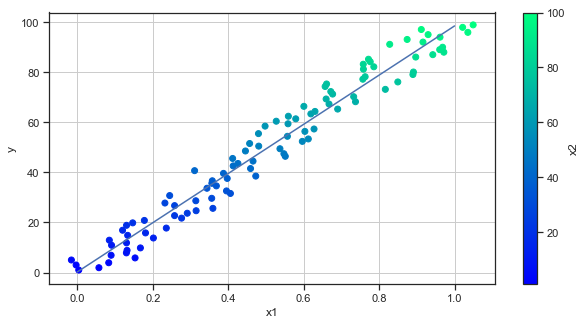

In [137]:
newdf = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2,
    'ey': smf.ols(formula='y ~ x2', data=df).fit().resid,
    'ex1': smf.ols(formula='x1 ~ x2', data=df).fit().resid})
params = smf.ols(formula='y ~ x1', data=df).fit().params
x = np.linspace(0, 1, 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
sc = ax.scatter(x=x1, y=y, c=x2, cmap=cm, data=newdf)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('x1') ; ax.set_ylabel('y')
fig.colorbar(sc, ax=ax).set_label('x2')
ax.grid() ; plt.show()

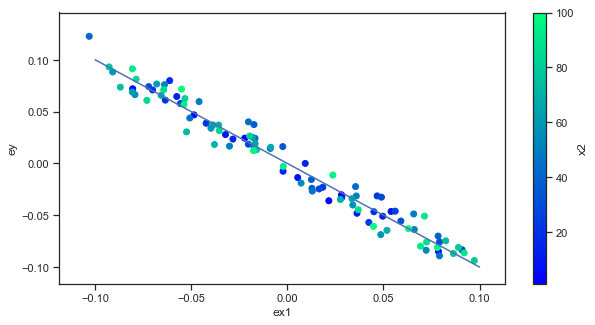

In [160]:
params = smf.ols(formula='ey ~ ex1', data=newdf).fit().params
x = np.linspace(-0.1, 0.1, 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
sc = ax.scatter(x=newdf.ex1.values, y=newdf.ey.values, c=newdf.x2.values, cmap=cm)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('ex1') ; ax.set_ylabel('ey')
fig.colorbar(sc, ax=ax).set_label('x2')
plt.show()

In [139]:
print(np.corrcoef(swiss.Agriculture, swiss.Education)[0][1])
print(np.corrcoef(swiss.Education, swiss.Examination)[0][1])
print(np.corrcoef(swiss.Agriculture, swiss.Fertility)[0][1])

-0.63952251894832
0.6984152962884828
0.35307918361997487


In [140]:
swiss2 = swiss.copy()
swiss2['z'] = swiss2['Agriculture'] + swiss2['Education']

lm = smf.ols(formula='Fertility ~ Agriculture + Examination + Education + Catholic + InfantMortality + z', 
             data=swiss2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sun, 12 May 2019   Prob (F-statistic):           5.59e-10
Time:                        14:19:00   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture         0.1756      0.062      2.852      0.007       0.051       0.300
Examination        -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education          -0.5233      0.115     -4.536      0.000      -0.756      -0.290
Catholic            0.1041      0.035      2.953      0.005       0.033       0.175
InfantMortality     1.0770      0.382      2.822      0.007       0.306       1.848
z                  -0.3477      0.073     -4.760      0.000      -0.495      -0.200
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                     2.36e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [141]:
insectsprays = pd.read_csv('insect_sprays.csv')
insectsprays.head()

,Unnamed: 0,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A


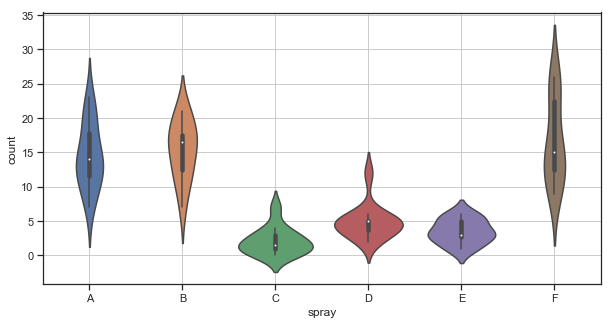

In [177]:
# see https://seaborn.pydata.org/generated/seaborn.violinplot.html
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.violinplot(x='spray', y='count', data=insectsprays, ax=ax)
ax.grid()
plt.show()

In [143]:
lm = smf.ols(formula='count ~ spray', data=insectsprays).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Sun, 12 May 2019   Prob (F-statistic):           3.18e-17
Time:                        14:19:00   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5000      1.132     12.807      0.000      12.240      16.760
spray[T.B]     0.8333      1.601      0.520      0.604      -2.363       4.030
spray[T.C]   -12.4167      1.601     -7.755      0.000     -15.613      -9.220
spray[T.D]    -9.5833      1.601     -5.985      0.000     -12.780      -6.387
spray[T.E]   -11.0000      1.601     -6.870      0.000     -14.197      -7.803
spray[T.F]     2.1667      1.601      1.353      0.181      -1.030       5.363
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.421
Skew:                           0.411   Prob(JB):                        0.298
Kurtosis:                       3.360   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
insectsprays.head()

,Unnamed: 0,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A


In [180]:
is2 = insectsprays.copy()
for x in ['A', 'B', 'C', 'D', 'E', 'F']:
    is2[x] = 1*(is2.spray == x) # is2[x] = is2[x].astype(float)
print(is2.head())

lm = smf.ols(formula='count ~ B + C + D + E + F', data=is2).fit()
print(lm.summary())

# vezi condition number cand introducem A (redundant)

   Unnamed: 0  count spray  A  B  C  D  E  F
0           1     10     A  1  0  0  0  0  0
1           2      7     A  1  0  0  0  0  0
2           3     20     A  1  0  0  0  0  0
3           4     14     A  1  0  0  0  0  0
4           5     14     A  1  0  0  0  0  0
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Sun, 12 May 2019   Prob (F-statistic):           3.18e-17
Time:                        16:04:49   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:   

In [146]:
lm = smf.ols(formula='count ~ A + B + D + E + F', data=is2).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Sun, 12 May 2019   Prob (F-statistic):           3.18e-17
Time:                        14:19:01   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0833      1.132      1.840      0.0

In [178]:
lm = smf.ols(formula='count ~ spray - 1', data=insectsprays).fit()
lm.summary()

# vezi mai multe la http://www.statsmodels.org/dev/example_formulas.html

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Sun, 12 May 2019   Prob (F-statistic):           3.18e-17
Time:                        15:54:35   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spray[A]      14.5000      1.132     12.807      0.000      12.240      16.760
spray[B]      15.3333      1.132     13.543      0.000      13.073      17.594
spray[C]       2.0833      1.132      1.840      0.070      -0.177       4.344
spray[D]       4.9167      1.132      4.343      0.000       2.656       7.177
spray[E]       3.5000      1.132      3.091      0.003       1.240       5.760
spray[F]      16.6667      1.132     14.721      0.000      14.406      18.927
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.421
Skew:                           0.411   Prob(JB):                        0.298
Kurtosis:                       3.360   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresia cu variabile continue și categoriale

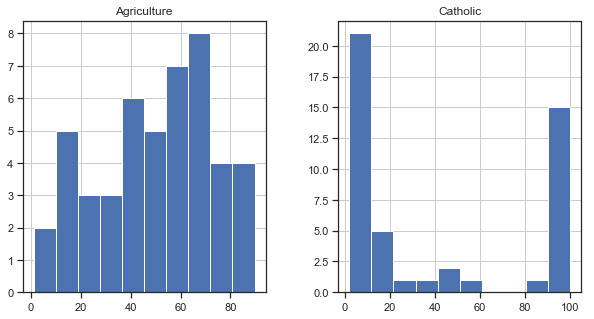

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
swiss.hist(column=['Agriculture', 'Catholic'], bins=10, ax=ax)
plt.show()

In [193]:
swiss3 = swiss.copy()
swiss3['CatholicBin'] = 1 * (swiss.Catholic > 50)
swiss3.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality,CatholicBin
0,Courtelary,80.2,17.0,15,12,9.96,22.2,0
1,Delemont,83.1,45.1,6,9,84.84,22.2,1
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2,1
3,Moutier,85.8,36.5,12,7,33.77,20.3,0
4,Neuveville,76.9,43.5,17,15,5.16,20.6,0


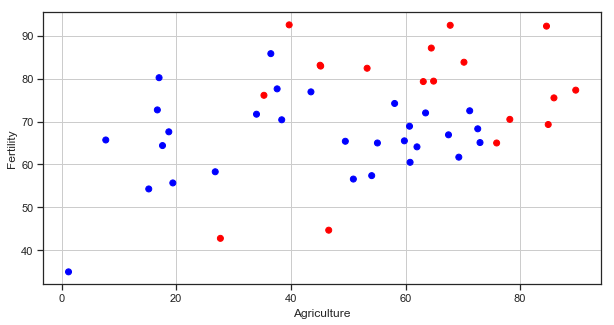

In [197]:
swiss3 = swiss.copy() ; swiss3['CatholicBin'] = 1 * (swiss.Catholic > 50)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(swiss3.Agriculture, swiss3.Fertility, 
            c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
plt.grid() ; plt.show()

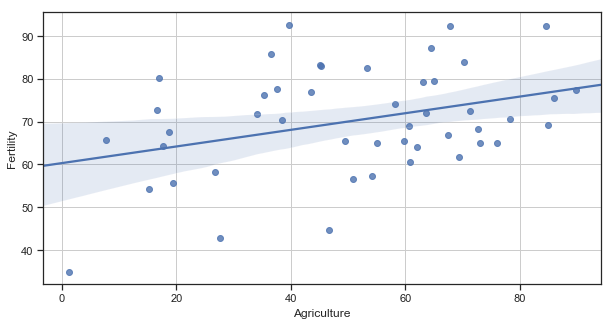

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.regplot(y='Fertility', x='Agriculture', data=swiss3, ax=ax)
plt.grid() ; plt.show()

In [201]:
lm = smf.ols(formula='Fertility ~ Agriculture', data=swiss3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Sun, 12 May 2019   Prob (F-statistic):             0.0149
Time:                        17:32:58   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
lm = smf.ols(formula='Fertility ~ Agriculture + C(CatholicBin)', data=swiss3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     5.660
Date:                Sun, 12 May 2019   Prob (F-statistic):            0.00649
Time:                        16:54:22   Log-Likelihood:                -179.48
No. Observations:                  47   AIC:                             365.0
Df Residuals:                      44   BIC:                             370.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.8322      4.106     14.816      0.000      52.557      69.107
C(CatholicBin)[T.1]     7.8843      3.748      2.103      0.041       0.330      15.439
Agriculture             0.1242      0.081      1.531      0.133      -0.039       0.288
==============================================================================
Omnibus:                        6.176   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.983
Skew:                          -0.696   Prob(JB):                       0.0828
Kurtosis:                       3.778   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

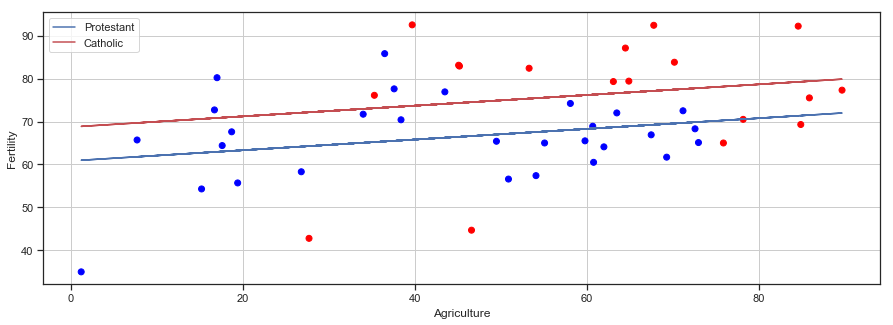

In [210]:
params = smf.ols(formula='Fertility ~ Agriculture + C(CatholicBin)', data=swiss3).fit().params
x = swiss3.Agriculture.values ; fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(swiss3.Agriculture, swiss3.Fertility, c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.plot(x, params[0] + params[2] * x, 'b')
ax.plot(x, params[0] + params[1] + params[2] * x, 'r')
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
ax.legend(['Protestant', 'Catholic']) ; plt.grid() ; plt.show()

In [215]:
lm = smf.ols(formula='Fertility ~ Agriculture * C(CatholicBin)', data=swiss3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.795
Date:                Sun, 12 May 2019   Prob (F-statistic):             0.0168
Time:                        18:03:05   Log-Likelihood:                -179.34
No. Observations:                  47   AIC:                             366.7
Df Residuals:                      43   BIC:                             374.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

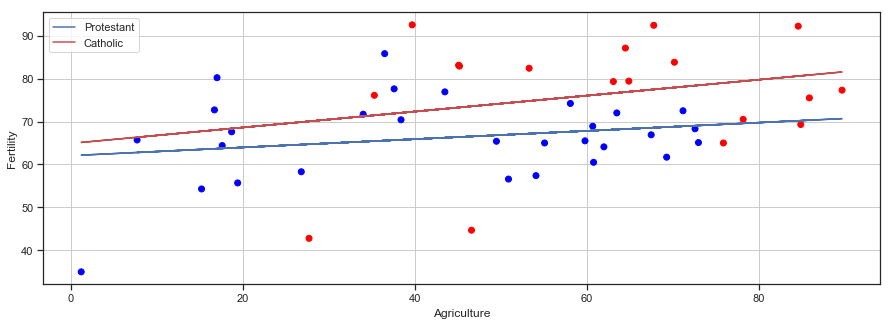

In [218]:
x = swiss3.Agriculture.values ; fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(swiss3.Agriculture, swiss3.Fertility, c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.plot(x, lm.params[0] + lm.params[2] * x, 'b')
ax.plot(x, lm.params[0] + lm.params[1] + (lm.params[2] + lm.params[3]) * x, 'r')
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
ax.legend(['Protestant', 'Catholic']) ; plt.grid() ; plt.show()

In [152]:
# vezi https://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf

# Laborator

__Q1__. Pentru swiss dataset, realizați modelul de regresie liniară pentru Fertility în funcție de Agriculture și Education. Remarcați intercept și cei doi coeficienți.

Mai departe arătați cum coeficientul regresorului $x_1$ (Agriculture) este de fapt coeficientul regresiei caracteristice răspunsului $y$ (Fertility) și regresorului $x_2$ (Education) din care contribuția celuilalt regresor ($x_1$) a fost deja înlăturată.

__Hint1__: contribuția unui regresor nu mai este prezentă în reziduul asociat, și se înlătură folosind regresia liniară (revedeți slide-urile 42-end din cursul 7).

__Hint2__: folosiți proprietatea .resid a modelului deja potrivit.

In [5]:
swiss = pd.read_csv('swiss.csv')
swiss.columns = ['District', 'Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 
                 'InfantMortality']
swiss.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


__Q2__. Pentru setul mtcars, considerați variabila categorială 'număr de cilindri'.

a) Ridicați diagrama pair plot.

b) Calculați coeficienții de regresie. Există variabile care par să explice consumul?

c) Ridicați pe un scatter plot regresia mpg funcție de horsepower.

d) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem că nu există interacțiune între horsepower și numărul de cilindri.

e) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem acum că există totuși interacțiune.